### Assignment 4 - Ruggiero Julian

#### 1) Write a Python/NumPy code block that finds the distinct/unique common items between these two arrays:

a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])

b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])

Your output should contain only the distinct overlapping values. For example, if a 2 is found in both array a and array b, your output should contain only one 2 even if array a contains more than one 2 within it.

##### Solution

For this first task I will:
- Extract the unique values from each array and define new arrays unique_a and unique_b
- Use of 1n1d function to test if the values in unique_a are in unique_b (this returns a boolean array)
- Pass the boolean array in the step above to the unique_a to get the values that are common between the two original arrays a and b
- Use of array2string function to concatenate the results in the print statement

In [1]:
import numpy as np
a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])
# First I get the unique values in each array
unique_a=np.unique(a)
unique_b=np.unique(b)
#get the values that are common between the two original arrays a and b
results_task1=unique_a[np.in1d(unique_a,unique_b)]
print("Results task1 \nThe distinct/unique common items between these two arrays are "+np.array2string(results_task1))

Results task1 
The distinct/unique common items between these two arrays are [2 4]


#### 2) Create the following 5x3 array using knowledge you have of Python’s / NumPy’s sequencing functionality so that you do not need to explicitly key in every integer value.
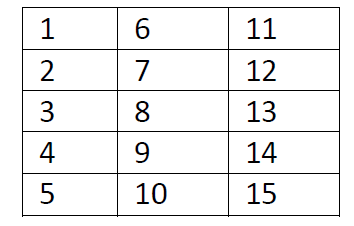

##### Solution

For this second task I will make it in one step, but applying the logic below:

- Define 1-dimensional array from 1 to 15(inclusive).
- Reshape to a 2-dimensional array of 3 rows and 5 columns (this is done to be able to use T method in the next step).
- Use the T method to change from 3x5 to 5x3 array.

In [2]:
task2=np.arange(1,16).reshape(3,5).T
print(f"The 5x3 array is \n {task2}")

The 5x3 array is 
 [[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


#### 3) You are given the following two arrays:
a = np.array([12, 5, 7, 15, 3, 1, 8])

b = np.array([14, 6, 3, 11, 19, 12, 5])

Write a Python/Numpy code block that removes from array a any items that are also present in array b.

##### Solution

For this second task I will:

- Use of 1n1d function to test if the values in a are in b (this returns a boolean array).
- Define the boolean array "condition" inverting the previous step with the ~ operator.
- Apply the "condition" to the original array to remove from 'a' any items that are also present in 'b' and print the results

In [5]:
a = np.array([12, 5, 7, 15, 3, 1, 8])
b = np.array([14, 6, 3, 11, 19, 12, 5])
#creating the "condition" boolean array by reversin the in1d function.
condition=~np.array([np.in1d(a,b)])
print("Results task3 \nAfter removing from array 'a' the items that are also present in array 'b', the result is ")
a[condition[0]]

Results task3 
After removing from array 'a' the items that are also present in array 'b', the result is 


array([ 7, 15,  1,  8])

#### 4) Suppose you have ridden a bicycle from New York City to Key West, Florida. Your bicycle odometer shows the total miles you have travelled thus far, which you make a note of each day with paper and pencil. Your first two entries might be ‘55’ and ‘120’, indicating that you rode your bike 55 miles on day 1 and 65 miles on day 2. Your task is to create a NumPy array wherein you can record the cumulative miles you recorded each day during your trip. Then use your Python skills to show the total miles that you rode each day. Assume the trip took a total of 35 days and included at least 4 non-consecutive days where no cycling was possible due to either weather conditions or personal fatigue/soreness. For the remaining 31 days, you would have covered the entire distance between NYC and Key West. Complete your work within your Jupyter Notebook for this assignment and be sure to include a writeup explaining your approach to this problem, including the ways in which you decided to make use of NumPy.

##### Solution

After searching on Google, the distance in miles for ridding from New York City to Key West, Florida is 1638 miles. The steps for this solucion are:
- Create a random numpy array of 35 elements, from 1 to 1638.
- Sort the results.
- Replace the last value to be 1638 to simulate that this is the end of the ride.
- Create a function that uses numpy to to get 4 random values from the array and check that the random choices are not the same and non consecutive.
- Change the value of the previous day to be the ones selected randomly, to simulate that 0 miles were completed each of the 4 random days.
- Calculate the difference between each element with the diff function
- Convert the numpy to a list, because the diff ommits the first element, so to be able to extract from the original cumulative array the 1st element and add to the beginning of the new list
- Create a dict comprehension to show the amount of miles traveled each day

In [19]:
#create random array of 35 integers between 1 and 1638
ran=np.random.randint(1,1638,35)
#sort the numbers to simulate the cumulative miles recorded for the total ride
cumulative=np.sort(ran)
#the last number of miles should be 1638, so replacing the last item
cumulative[len(cumulative)-1]=1638
print(f"The numpy array containing the cumulative miles is below: \n\n {cumulative}")

The numpy array containing the cumulative miles is below: 

 [ 127  131  196  259  291  525  532  541  541  602  609  613  681  704
  706  733  803  814  931  939  941  942 1103 1120 1148 1192 1220 1221
 1235 1287 1361 1448 1452 1573 1638]


In [20]:
#include at least 4 non-consecutive days where no cycling was possible due to either weather conditions or personal fatigue/soreness
#select 4 random elements from the array "cumulative"
def non_consecutive_index(array,k):
    '''This function accepts a numpy array and an integer.
    Will simulate the indexes of the array provided as input
    and select 4 random indexes that are not equal and non consecutive to each other.
    This loop can run multiple times until the conditions above are met'''
    finish=False
    #defining the begining of the loop, that will run until conditions are met
    while finish is False:
        #define the indexes from 0 to 35
        indexes=np.arange(0,len(array))
        #pick k number of random values
        choices=np.random.choice(indexes, k)
        #sort the numpy array containing the k indexes
        sortChoices=sorted(choices)
        #calculate the difference between each value and the next one
        diffChoices=np.diff(sortChoices)
        #check that the values are not the same (0 in diffChoices)
        #check that the values are not consecutives (1 in diffChoices)
        #also check that the selected index is not the first one, just wanted to avoid stoping the byke ride at the first day
        if 0 in diffChoices or 0 in sortChoices:
            continue
        #check that the values are not consecutives (1 in diffChoices)    
        elif 1 in diffChoices:
            continue
        else:
            finish=True
    #when the numpy array is ready with non repeated and non consecutive elements then it is returned
    return sortChoices

In [21]:
#call the function above and print to check that it worked ok, should display 4 different and non consecutive indexes
indexes=non_consecutive_index(cumulative,4)
print(indexes)

[9, 21, 23, 33]


In [22]:
#iterate throw the indexes list to replace with the previous value
for item in indexes:
    cumulative[item-1]=cumulative[item]
#print new array with the random values selected with the previous value index to show that 
#no progress was accomplised that day
cumulative

array([ 127,  131,  196,  259,  291,  525,  532,  541,  602,  602,  609,
        613,  681,  704,  706,  733,  803,  814,  931,  939,  942,  942,
       1120, 1120, 1148, 1192, 1220, 1221, 1235, 1287, 1361, 1448, 1573,
       1573, 1638])

In [24]:
#calculate the difference between each element and convert to a list
miles_x_day=np.diff(cumulative).tolist()
#add the first element at the beginning of the list (because it is ommited in the diff function)
miles_x_day.insert(0,cumulative[0])
dic={}
#create a dict comprehension to include a reference for the miles traveled each day
dic={'Day '+str(i+1):miles_x_day[i] for i in range(len(miles_x_day))}
dic

{'Day 1': 127,
 'Day 2': 4,
 'Day 3': 65,
 'Day 4': 63,
 'Day 5': 32,
 'Day 6': 234,
 'Day 7': 7,
 'Day 8': 9,
 'Day 9': 61,
 'Day 10': 0,
 'Day 11': 7,
 'Day 12': 4,
 'Day 13': 68,
 'Day 14': 23,
 'Day 15': 2,
 'Day 16': 27,
 'Day 17': 70,
 'Day 18': 11,
 'Day 19': 117,
 'Day 20': 8,
 'Day 21': 3,
 'Day 22': 0,
 'Day 23': 178,
 'Day 24': 0,
 'Day 25': 28,
 'Day 26': 44,
 'Day 27': 28,
 'Day 28': 1,
 'Day 29': 14,
 'Day 30': 52,
 'Day 31': 74,
 'Day 32': 87,
 'Day 33': 125,
 'Day 34': 0,
 'Day 35': 65}

#### 5) Open the Jupyter Notebook provided to you with this assignment. The first code block within that file will load a small data set from a GitHub repository into a NumPy 2D array. The original source of that data contains an overview of its contents:

https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m

Scroll down to the bottom of that page to access an interactive data viewer that includes the column headings for the data.
Using the NumPy array that has been loaded for you in the Jupyter Notebook, answer the following questions using NumPy’s slicing, methods, and functions:

- What is the maximum yearly NYC consumption of water in millions of gallons per day?
- How many calendar years are represented within this data set? NumPy's shape command is one way to find out.
- What is the mean and the standard deviation of the per capita daily water consumption?
- What is the increase or decrease in population from year to year? Use NumPy's `diff` function to create an array of differences and save that to a variable called "pop_diff", then print that variable to the screen.

In [26]:
import pandas
import numpy as np

# supress scientific notation
np.set_printoptions(suppress = True)

# read the data file from GitHub and convert to a NumPy ndarray object
nyc_water = pandas.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Week4/Water_Consumption_In_The_New_York_City.csv').as_matrix()

# verify you have an ndarray object
type(nyc_water)

C:\Users\julir\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


numpy.ndarray

In [31]:
#What is the maximum yearly NYC consumption of water in millions of gallons per day?
#I use the numpy slicing to get only the values in the 3rd column to get the max number
max_water=max(nyc_water[:,2])
print("The maximum yearly NYC consumption of water in millions of gallons per day is "+str(max_water))

The maximum yearly NYC consumption of water in millions of gallons per day is 1512.0


In [32]:
#How many calendar years are represented within this data set?
#I use the shape method, that returns (rows,columns) and retrieve the 1st element ([0]), which is the number of rows
print(f"There are {nyc_water.shape[0]} calendar years within this data set \n") 
print("From the original link there are rows from 1972 to 2018, which means that there are actually 40 rows, "
      "but the 'raw' data contains up to 2017, means 39 rows")

There are 39 calendar years within this data set 

From the original link there are rows from 1972 to 2018, which means that there are actually 40 rows, but the 'raw' data contains up to 2017, means 39 rows


In [33]:
#What is the mean and the standard deviation of the per capita daily water consumption?
#I use the slice method to get all rows, and only the 4th column, then use the numpy mean and std functions
mean_per_capita=np.mean(nyc_water[:,3])
std=np.std(nyc_water[:,3])
print(f"The mean of the per capita daily water consumption is {int(mean_per_capita)} and the standard deviation is {int(std)}") 

The mean of the per capita daily water consumption is 160 and the standard deviation is 31


In [35]:
#What is the increase or decrease in population from year to year?
#I use numpy slicing to get all rows, and only the 2nd column, and calculate with the diff function the difference
#between each row
pop_diff=np.diff(nyc_water[:,1])
print(f"The array of differences in population from year to year is \n\n {pop_diff}")

The array of differences in population from year to year is 

 [-30461.   17602.   19864.   72119.   53290.   39540.   45192.   23230.
  11243.   -9544.   -8525.   38851.   54443.   77222.   64292.   62582.
  64772.   75631.   84816.   89401.   60618.   16685.5  16685.5  16685.5
  16685.5  16685.5  16685.5  16685.5  16685.5  16685.5  16685.5 108965.
  77081.   61281.   49530.   44512.   21171.   85025. ]
